# Mathematical Definitions

**Definition (neural network):** A *neural network* $\operatorname{NN}$ is a tuple $\operatorname{NN}=(A_l, b_l, \sigma_l)_{1 \leq l \leq N_l}$ defined by
* a numer $n_i$ of *inputs*,
* a number $n_o$ of *outputs*
* a number $N_L$ of *layers* and
* for each layer $1 \leq l \leq N_L$ 
  * a number $n_l$ of *neurons* (or *units*),
  * a matrix $A_{l} = (A_{l;ij}) \in \mathbb{R}^{n_{l-1} \times n_l}$ and a vector $b_l = b_{l;i} \in \mathbb{R}^{n_l}$ of *weights* such that $n_0 = n_i$, $n_{N_L}=n_o$ and
  * an *activation function* $\sigma_l:\mathbb{R} \to \mathbb{R}$.
For any $1 \leq l \leq N_L$, the tuple $(A_l, b_l, \sigma_l)$ is called a *layer*. For $l=N_L$, the layer is called *output layer* and for $1 \leq l<N_L$, the layer is called *hidden layer*.

**Definition (feed forward):** Let $\operatorname{NN}=(A_l, b_l, \sigma_l)_{1 \leq l \leq N_l}$  be a neural network. Then for each $1 \leq l \leq N_l$, we define a function 
$$F_l:\mathbb{R}^{n_{l-1}} \to \mathbb{R}^{n_l}, \qquad v \mapsto \sigma_l(v^T A_l + b_l),$$
where we employ the convention that $\sigma_l$ is applied in every component.
The composition $F:\mathbb{R}^{n_i} \to \mathbb{R}^{n_o}$, $F := F_{N_L} \circ \ldots \circ F_2 \circ F_1$ is called the *feed forward* of  $\operatorname{NN}$. Any set of inputs $x \in \mathbb{R}^{n_i}$ is called an *input layer*.

# Graphical Illustration

In [1]:
import matplotlib.pyplot as plt

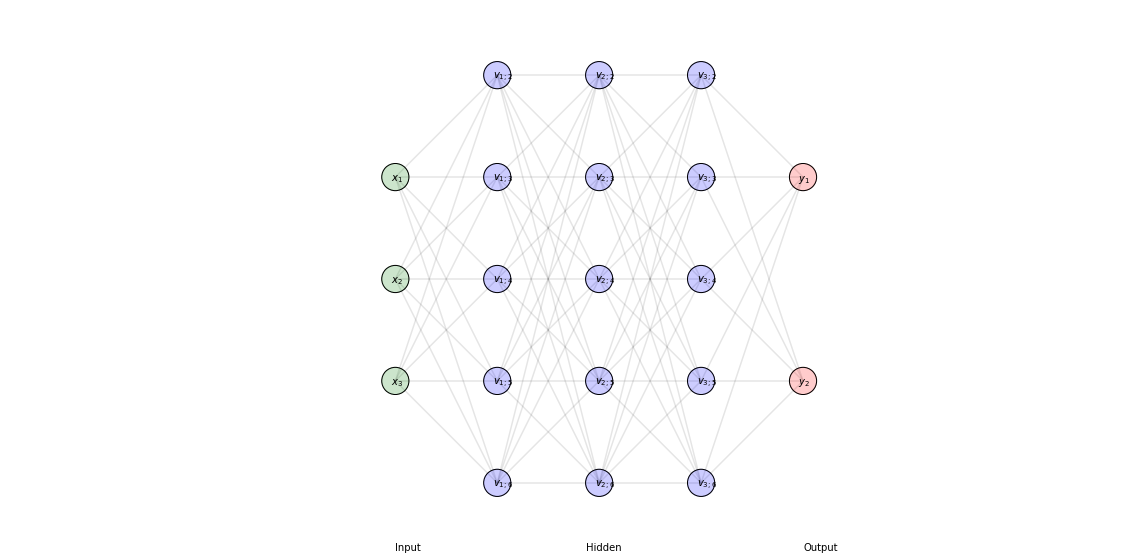

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis("equal")
xs = 1.5
ys = 1.5
radius=0.2

def add_circle(x, y, label, color='r'):
    c1 = plt.Circle((x, y), radius, alpha=0.2, color=color, zorder=1)
    c2 = plt.Circle((x, y), radius, color='k', fill=False, zorder=1)
    ax.add_artist(c1)
    ax.add_artist(c2)
    ax.text(x-radius/3, y-radius/3, label)
    
def add_line(x1, x2, y1, y2):
    ax.plot([x1, x2], [y1, y2], alpha=0.1, color='k', zorder=-1)
    
for unit in (1, 0, -1):
    add_circle(0, unit * xs, "$x_{%s}$" % str(3 - unit - 1), color='green')
for hlayer in (1,2,3):
    for unit in (-2, -1, 0, 1, 2):
        add_circle(hlayer * xs, unit * ys, "$v_{%s;%s}$" % (str(hlayer),str(5 - unit - 1)), color='blue')
for unit in (-1, 1):
    add_circle(4*xs, unit * ys, "$y_{%s}$" % ("1" if unit==1 else "2"), color='red')
for iunit in (-1, 0, 1):
    for hunit in (-2, -1, 0, 1, 2):
        add_line(0, xs, iunit*ys, hunit*xs)
for hlayer in (1, 2):
    for unita in (-2, -1, 0, 1, 2):
        for unitb in (-2, -1, 0, 1, 2):
            add_line(hlayer*xs, (hlayer+1)*xs, unita*ys, unitb*ys)
for hunit in (-2, -1, 0, 1, 2):
    for ounit in (-1, 1):
        add_line(3*xs, 4*xs, hunit*ys, ounit*xs)
ax.text(0, -4, "Input")
ax.text(2.8, -4, "Hidden")
ax.text(6, -4, "Output")
        
ax.set_xlim([0,5])
ax.set_ylim([-4,4])
_ = plt.axis('off')

Neural networks can be visualized like in the above picture: This shows a network $(A_l, b_l, \sigma_l)_{1 \leq l \leq N_L}$ with a total of $N_L=4$ layers, i.e. $3$ layers are hidden. Notice that the input layer is just a visualization of the input and is not part of the actual network topology. 

The links between the nodes visualize the feedforward. This can be seen as follows: The input layer as $n_i=3$ units, i.e. any $x \in \mathbb{R}^3$ can be used as an input layer. The first hidden layer as $n_1=5$ units, i.e. the first function in the feedforward is a map $F_1: \mathbb{R}^3 \to \mathbb{R}^5$, $x \mapsto F_1(x) = \sigma(xA_1 + b_1)$. If we unwind the definition of the matrix-vector multiplication and compute the components $v_{1;i}$ of the result $v_1 := F_1(x) $, we obtain for any $1 \leq i \leq 5$
$$ v_{1;i} = \sigma_1 \Big{(} \sum_{j=1}^{3}{x_j A_{1;ij}}  \Big{)}$$
For the first component $i=1$, we can see that it depends on all the inputs, i.e. on $x_1, x_2, x_3$. This is visualized by the $3$ lines connecting the respective units. The same holds for the other components. 
The computation of the feedforward now proceeds through the second hidden layers in the same fashion as from the input layer into the first hidden layer, i.e. the computed outputs of the first layer $v_{1} \in \mathbb{R}^5$ can now be though of as an input to the second layer. Here, the feedforward function is $F_2:\mathbb{R}^5 \to \mathbb{R}^5$ and the layer computes $v_2 := F_2(v_1)$ again for every component $1 \leq i \leq 5$ via
$$ v_{2;i} = \sigma_2 \Big{(} \sum_{j=1}^{5}{x_j A_{2;ij}}  \Big{)}$$
The computation for $F_3:\mathbb{R}^5 \to \mathbb{R}^5$ is analogous and we obtain $v_3 := F_3(v_2)$. Finally, the output layer applies $F_4:\mathbb{R}^5 \to \mathbb{R}^2$ and we obtain $v_4 := F_4(v_3)$. The output layer computes this just like the hidden layer. By definition the result of the output layer is the final result of the complete computation, i.e. $y:= F(x) = v_4 = F_4(v_3)$.

# Implementation in Keras

Neural Networks can be conveniently set up in Python using `keras`. In order to train them, a backend is required. We chose `tensorflow` here.

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


## Setting up the model

We setup the neural network from the previous section in `keras`.

In [5]:
model = Sequential() # initializes the model whith no layers yet
model.add(Dense(units=5, input_dim=3, activation='sigmoid')) # first hidden layer needs to know the input dimension
model.add(Dense(units=5, activation='sigmoid')) # second hidden layer
model.add(Dense(units=5, activation='sigmoid')) # third hidden layer
model.add(Dense(units=2)) # output layer (uses linear activation here as a default)
model.compile(optimizer='adam', loss='MAE') # this creates the actual model (optimizer and loss metric are needed for training later)

## Inspecting the model

In [6]:
model.summary() # provides neat summary about the network topology and the parameters

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 12        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


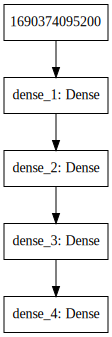

In [7]:
# keras can also plot the model automatically (Graphviz needs to be installed and in PATH)

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Inspecting the weights

In [8]:
# after the model is set up the weights are initialized with random values
model.get_weights() # notice that the shape of the matrices and vectors are as expected

[array([[ 0.35878724, -0.5162481 , -0.3888903 ,  0.34309798,  0.3729295 ],
        [ 0.08106333, -0.09510601, -0.39681777,  0.10853541, -0.50744724],
        [-0.7920403 , -0.3115853 ,  0.62463206, -0.4167155 ,  0.5597423 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.55350435,  0.4375962 , -0.20090371,  0.7717521 , -0.31451795],
        [-0.58810604,  0.43537545, -0.25035447, -0.0804643 , -0.27038282],
        [-0.6951821 ,  0.6719538 , -0.49296606,  0.440508  , -0.3184876 ],
        [-0.08813214, -0.34296653,  0.4016081 ,  0.36296093, -0.4816174 ],
        [-0.15055597,  0.27252686,  0.1511913 , -0.5133966 , -0.5156242 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.2398653 , -0.51232123, -0.6553677 , -0.36385936,  0.57705784],
        [ 0.03266162,  0.1161809 ,  0.09231567, -0.75881463,  0.3703848 ],
        [-0.63690615, -0.12692732,  0.08240438,  0.5068073 ,  0.57228744],
        [ 0.5598366 , -0.09583044,  0

## Feedforward

In [9]:
# we create an input layer
x = np.array([1,2,3])
X = x.reshape(1,3) # because usually ouputs are computed for multiple inputs, the input layer needs an additional axis here

In [10]:
Y = model.predict(X) # computes the outputs for all of the current inputs
y = Y[0] # currently, we only have one input
y

array([ 0.29785162, -0.11880402], dtype=float32)

## Reproduce the Computation

In this section, we manually reproduce the computation of `y` from `X`.

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
A = model.get_weights()[::2] # extracting the matrix weights
b = model.get_weights()[1::2] # extracting the vector weights

# compute the feedforward
v = [sigmoid(x @ A[0] + b[0])]
v.append(sigmoid(v[0] @ A[1] + b[1]))
v.append(sigmoid(v[1] @ A[2] + b[2]))
v.append(v[2] @ A[3] + b[3])
print(v[3])

# result is in the last vector, which should agree with the keras computation (up to numerical errors)
np.testing.assert_array_almost_equal(y,v[3])

[ 0.29785162 -0.11880404]
